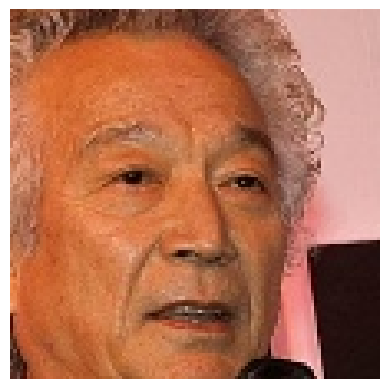

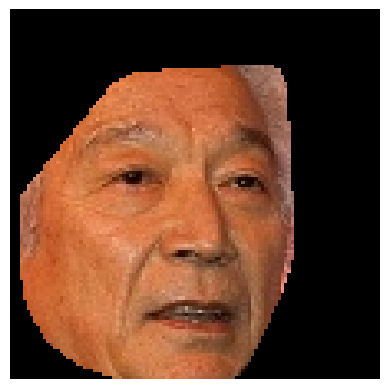

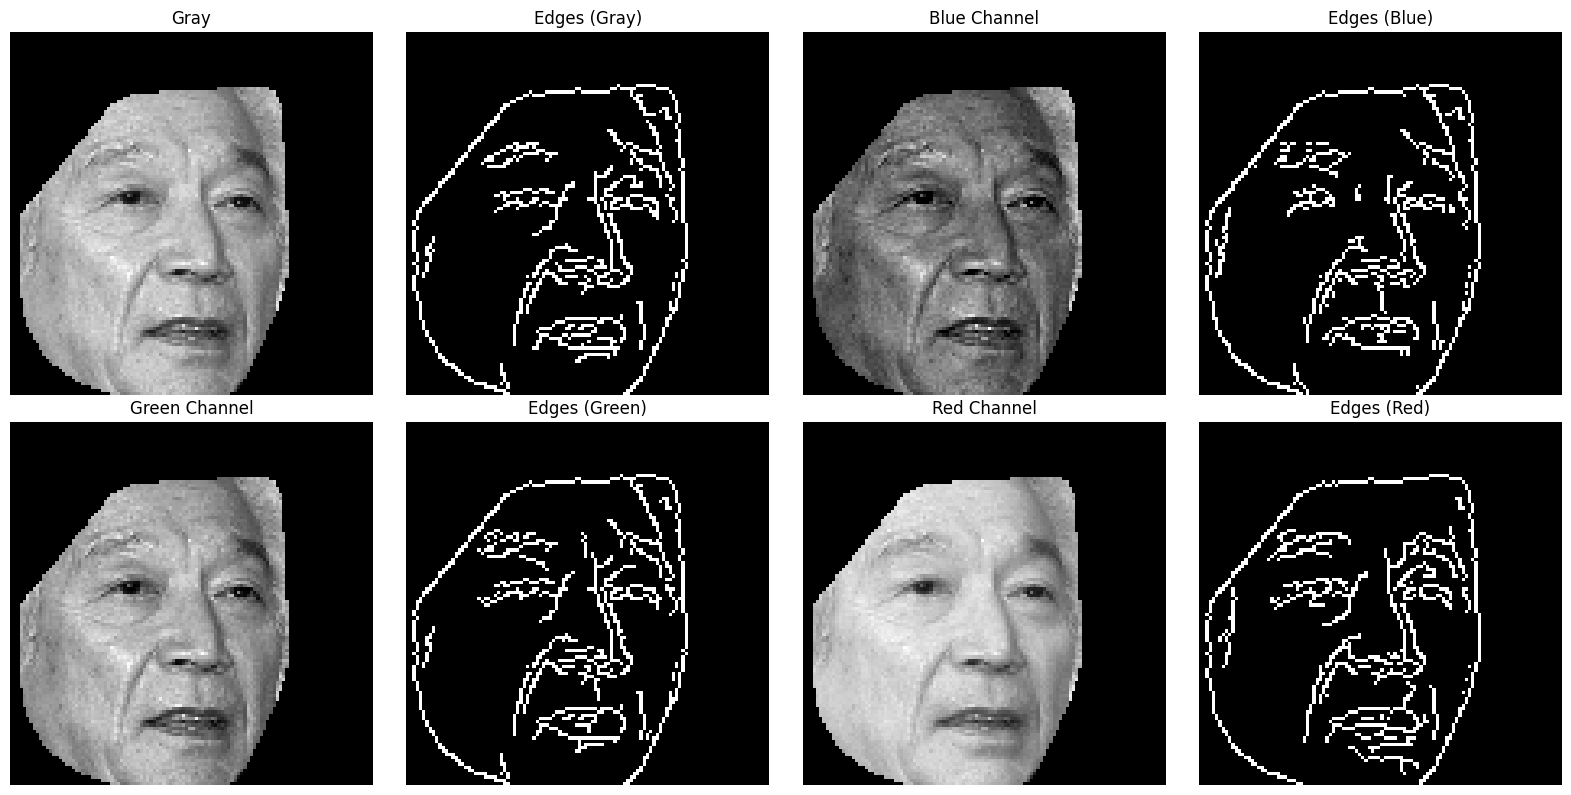

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import dlib

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  
img=cv2.imread("testset/1_ShinSeong-ii_73_m.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_view = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_view)
plt.axis("off")
plt.show()



rect = dlib.rectangle(0, 0, img.shape[1], img.shape[0])
shape = predictor(gray, rect)
landmarks = np.array([[pt.x, pt.y] for pt in shape.parts()])

hull = cv2.convexHull(landmarks)
hull_points = hull.reshape(-1, 2)

min_y = np.min(hull_points[:, 1])
offset = int(0.1 * img.shape[0])  


adjusted_points = []
for point in hull_points:
    if point[1] - min_y < 20:
        adjusted_points.append([point[0], max(0, point[1] - offset)])
    else:
        adjusted_points.append(point.tolist())


adjusted_hull = np.array(adjusted_points, dtype=np.int32)
adjusted_hull = cv2.convexHull(adjusted_hull)


mask = np.zeros_like(gray)
cv2.fillConvexPoly(mask, adjusted_hull, 255)


face_extracted = cv2.bitwise_and(img, img, mask=mask)
img_view = cv2.cvtColor(face_extracted, cv2.COLOR_BGR2RGB)
plt.imshow(img_view)
plt.axis("off")
plt.show() 


gray = cv2.cvtColor(face_extracted, cv2.COLOR_BGR2GRAY)

blue_channel = face_extracted[:, :, 0]
green_channel = face_extracted[:, :, 1]
red_channel = face_extracted[:, :, 2]

edges_gray = cv2.Canny(gray, 100, 200)
edges_blue = cv2.Canny(blue_channel, 100, 200)
edges_green = cv2.Canny(green_channel, 100, 200)
edges_red = cv2.Canny(red_channel, 100, 200)

images = [
    ("Gray", gray),
    ("Edges (Gray)", edges_gray),
    ("Blue Channel", blue_channel),
    ("Edges (Blue)", edges_blue),
    ("Green Channel", green_channel),
    ("Edges (Green)", edges_green),
    ("Red Channel", red_channel),
    ("Edges (Red)", edges_red)
]


plt.figure(figsize=(16, 8))
for i, (title, image) in enumerate(images):
    plt.subplot(2, 4, i+1)
  
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
  
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()

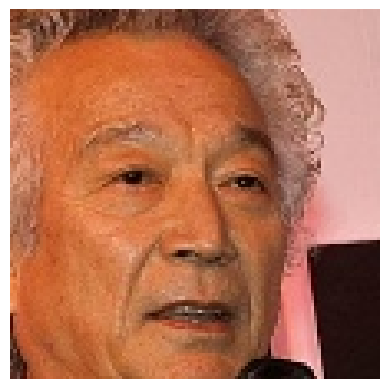

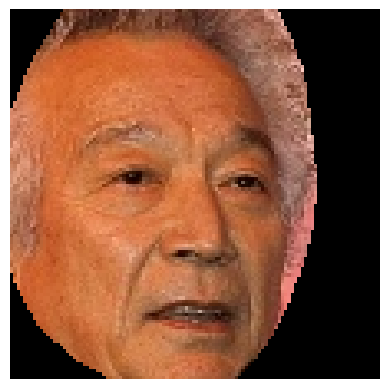

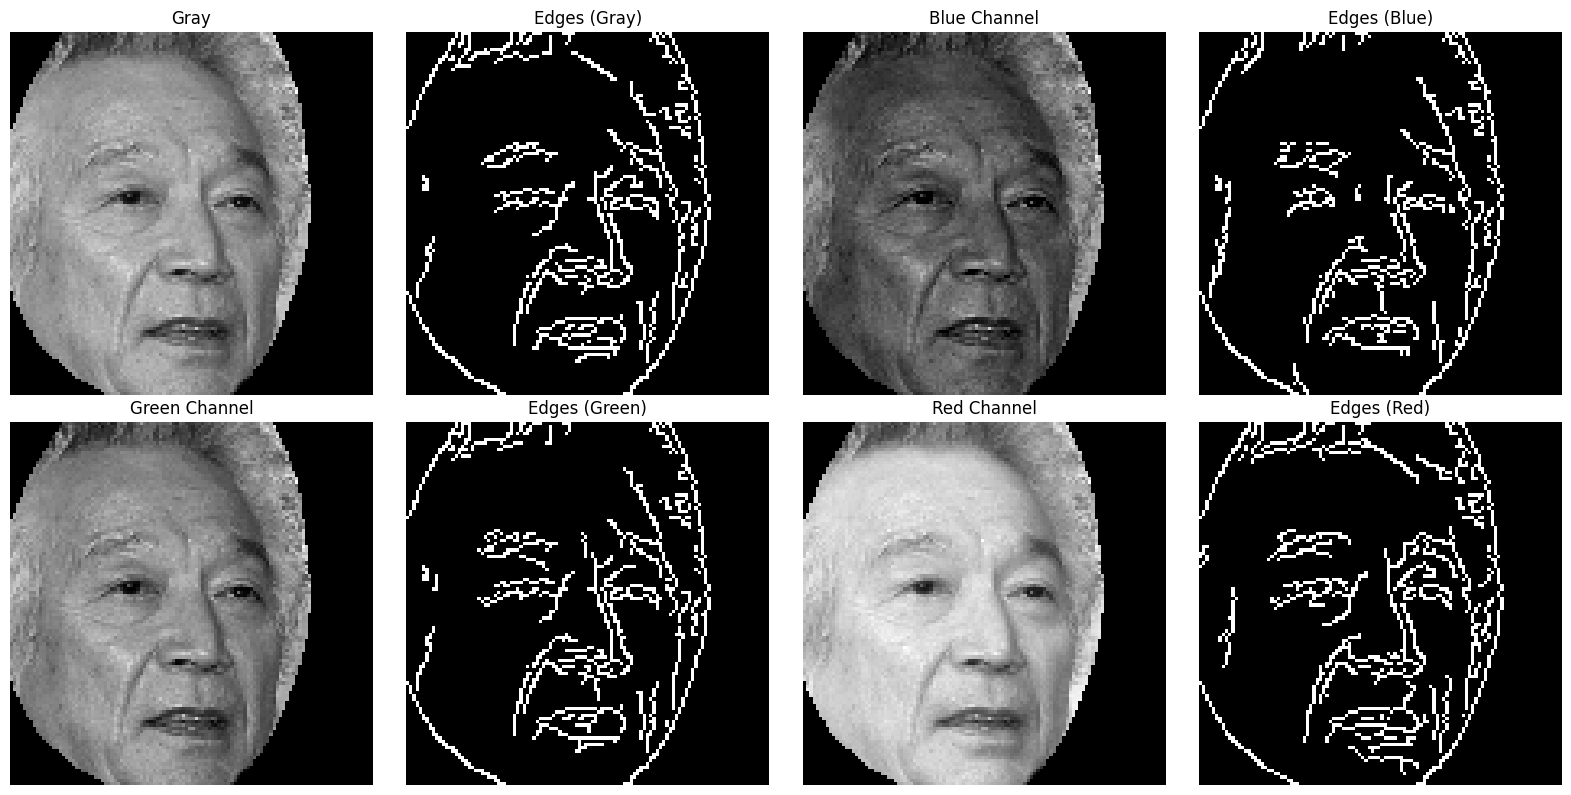

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import dlib

predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")  
img=cv2.imread("testset/1_ShinSeong-ii_73_m.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_view = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_view)
plt.axis("off")
plt.show()



rect = dlib.rectangle(0, 0, img.shape[1], img.shape[0])
shape = predictor(gray, rect)
landmarks = np.array([[pt.x, pt.y] for pt in shape.parts()])

hull = cv2.convexHull(landmarks)
hull_points = hull.reshape(-1, 2)

min_y = np.min(hull_points[:, 1])
offset = int(0.1 * img.shape[0])  



adjusted_hull = np.array(hull_points, dtype=np.int32)
adjusted_hull = cv2.convexHull(adjusted_hull)


mask = np.zeros_like(gray)
cv2.fillConvexPoly(mask, adjusted_hull, 255)


face_extracted = cv2.bitwise_and(img, img, mask=mask)
img_view = cv2.cvtColor(face_extracted, cv2.COLOR_BGR2RGB)
plt.imshow(img_view)
plt.axis("off")
plt.show() 


gray = cv2.cvtColor(face_extracted, cv2.COLOR_BGR2GRAY)

blue_channel = face_extracted[:, :, 0]
green_channel = face_extracted[:, :, 1]
red_channel = face_extracted[:, :, 2]

edges_gray = cv2.Canny(gray, 100, 200)
edges_blue = cv2.Canny(blue_channel, 100, 200)
edges_green = cv2.Canny(green_channel, 100, 200)
edges_red = cv2.Canny(red_channel, 100, 200)

images = [
    ("Gray", gray),
    ("Edges (Gray)", edges_gray),
    ("Blue Channel", blue_channel),
    ("Edges (Blue)", edges_blue),
    ("Green Channel", green_channel),
    ("Edges (Green)", edges_green),
    ("Red Channel", red_channel),
    ("Edges (Red)", edges_red)
]


plt.figure(figsize=(16, 8))
for i, (title, image) in enumerate(images):
    plt.subplot(2, 4, i+1)
  
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
  
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import frangi, gabor
from skimage import morphology, measure

def master_control(image):
    # 필요시 이미지 크기를 조절할 수 있습니다.
    # image = cv2.resize(image, (int(image.shape[1]*0.3), int(image.shape[0]*0.3)), interpolation=cv2.INTER_CUBIC)
    
    # 채널 분리 (여기서는 Green 채널 사용)
    b, g, r = cv2.split(image)

    # Frangi 필터 적용 (주름과 같이 선형 구조를 강조)
    sk_frangi_img = frangi(g, sigmas=np.linspace(0, 1, num=100), beta=1.5, gamma=0.01)
    sk_frangi_img = morphology.closing(sk_frangi_img, morphology.disk(1)
    
    # Gabor 필터 여러 방향 적용
    sk_gabor_img_1, _ = gabor(g, frequency=0.35, theta=0)
    sk_gabor_img_2, _ = gabor(g, frequency=0.35, theta=45)
    sk_gabor_img_3, _ = gabor(g, frequency=0.35, theta=90)
    sk_gabor_img_4, _ = gabor(g, frequency=0.35, theta=360)
    
    # 형태학적 열림 연산으로 노이즈 제거
    sk_gabor_img_1 = morphology.opening(sk_gabor_img_1, morphology.disk(2))
    sk_gabor_img_2 = morphology.opening(sk_gabor_img_2, morphology.disk(1))
    sk_gabor_img_3 = morphology.opening(sk_gabor_img_3, morphology.disk(2))
    sk_gabor_img_4 = morphology.opening(sk_gabor_img_4, morphology.disk(2))
    
    # Frangi 결과와 Gabor 결과 (여기서는 theta=45° 필터 사용)를 가중치 합산
    all_img = cv2.add(0.1 * sk_gabor_img_2, 0.9 * sk_frangi_img)
    all_img = morphology.closing(all_img, morphology.disk(1))
    
    # 임계값으로 이진화 (픽셀 값이 0.3 이상이면 1, 아니면 0)
    _, all_img = cv2.threshold(all_img, 0.3, 1, 0)
    
    # 연결된 영역 라벨링 및 작은 영역, 비정상 영역 제거
    bool_img = all_img.astype(bool)
    label_image = measure.label(bool_img)
    count = 0
    for region in measure.regionprops(label_image):
        if region.area < 10:  # 너무 작은 영역 제거
            for coord in region.coords:
                all_img[coord[0], coord[1]] = 0
            continue
        if region.eccentricity > 0.98:  # 길고 얇은 주름 영역
            count += 1
        else:
            for coord in region.coords:
                all_img[coord[0], coord[1]] = 0

    # medial axis를 통해 주름의 중심선(스켈레톤) 추출
    skel, _ = morphology.medial_axis(all_img.astype(int), return_distance=True)
    skels = morphology.closing(skel, morphology.disk(1))
    return skels, count

def face_wrinkle(path):
    # 이미지 읽기
    result = cv2.imread(path)
    if result is None:
        raise ValueError("이미지를 찾을 수 없습니다: " + path)
    
    # 주름 스켈레톤과 카운트 추출
    skels, count = master_control(result)
    print("검출된 주름 개수:", count)
    
    # 원본 이미지에 주름(스켈레톤) 영역을 흰색(255)으로 표시
    overlay = result.copy()
    overlay[skels > 0.1] = [255, 255, 255]
    
    # BGR 이미지를 RGB로 변환해서 matplotlib로 출력
    overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(overlay_rgb)
    plt.title("주름 검출 결과")
    plt.axis("off")
    plt.show()

# Jupyter Notebook 환경에서 테스트할 때 경로를 알맞게 수정하세요.
path = r"testset/2_HeoJin_74_w.jpg"
face_wrinkle(path)